## Machine Learning Assignment 1
### Murtaza Hussain (29449) and Muhammad Asad ur Rehman (29456)
UCI-ML Dataset Link: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [2]:
# Data Loader loads data from UCI-ML Repo
def load_dataset():
    # fetch dataset
    mushroom = fetch_ucirepo(id=602) 

    # data (as pandas dataframes) 
    x = mushroom.data.features 
    y = mushroom.data.targets 
    z = mushroom.data.original

    # metadata 
    print(mushroom.metadata) 

    # variable information 
    print(mushroom.variables)

    return x, y, z

# UCI-ML Repo Provides us with 3 Pandas DF inherently:
# 1. features (contains only the features)
# 2. targets (the targets to be preddicted)
# 3. original (contains both features and targets)
features, targets, original = load_dataset()

{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

In [3]:
# This function performs a missing value analysis on each column of the dataset, helps you decide on what to do in cleaning process
def null_check(df):
    null_columns = []
    for column in df.columns:
        print("Column Name:", column)
        print("Column DataType:", df[column].dtype)
        if df[column].dtype != 'float64':
            print("Column unique values:", df[column].unique())
        print("Column has null:", df[column].isnull().any())
        if df[column].isnull().any() == True:
            print("Column Null Count:", df[column].isnull().sum())
            null_columns.append(column)
        print("\n")
    return null_columns

null_cols = null_check(original)

Column Name: Area
Column DataType: int64
Column unique values: [28395 28734 29380 ... 42139 42147 42159]
Column has null: False


Column Name: Perimeter
Column DataType: float64
Column has null: False


Column Name: MajorAxisLength
Column DataType: float64
Column has null: False


Column Name: MinorAxisLength
Column DataType: float64
Column has null: False


Column Name: AspectRatio
Column DataType: float64
Column has null: False


Column Name: Eccentricity
Column DataType: float64
Column has null: False


Column Name: ConvexArea
Column DataType: int64
Column unique values: [28715 29172 29690 ... 42494 42667 42600]
Column has null: False


Column Name: EquivDiameter
Column DataType: float64
Column has null: False


Column Name: Extent
Column DataType: float64
Column has null: False


Column Name: Solidity
Column DataType: float64
Column has null: False


Column Name: Roundness
Column DataType: float64
Column has null: False


Column Name: Compactness
Column DataType: float64
Column has

In [4]:
# This function drops any null columns and missing values
# This is where you decide whether to remove NULL rows (which will reduce the size of Dataset) or remove NULL columns entirely. You can also choose a combination of both.
def clean_data(df, drop_columns, missing_value):
    # Remove unnecessary columns
    df.drop(drop_columns, axis=1, inplace=True)
    # Drop rows with any missing values
    if missing_value == False:
        df.dropna(inplace=True)
    else:
        df.fillna(missing_value, inplace=True)
    return df

clean_data(original,null_cols,False)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
# Transforms categorical and numberical data into numerical data
def transform_data(df):
    # Encode categorical variables
    label_encoder = LabelEncoder()
    print("Categorical columns:", df.select_dtypes(include=['object']).columns)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])
    
    # Standardize numerical features
    scaler = StandardScaler()
    print("Numerical columns:", df.select_dtypes(include=['float64', 'int64']).columns)
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) > 0:
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

transform_data(original)

Categorical columns: Index(['Class'], dtype='object')
Numerical columns: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,5
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138,5
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,5
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,5
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261424,0.055629,-0.006086,0.760813,3
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110383,0.285117,0.328393,0.722659,3
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104270,0.289205,0.336328,0.390251,3
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141907,0.228375,0.248973,0.036440,3


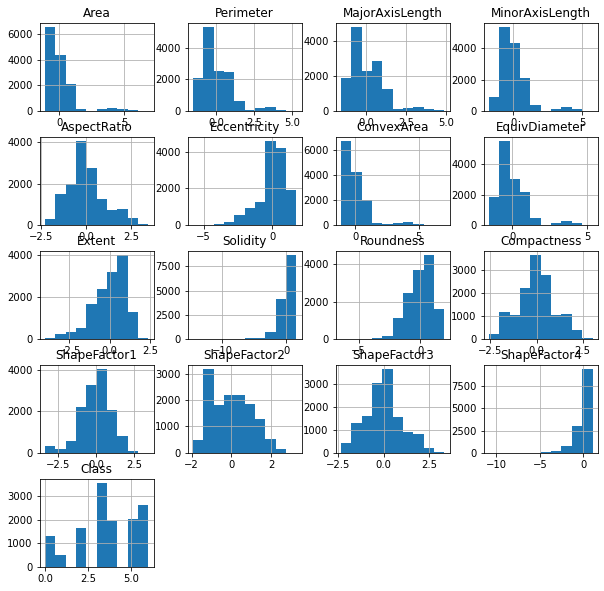

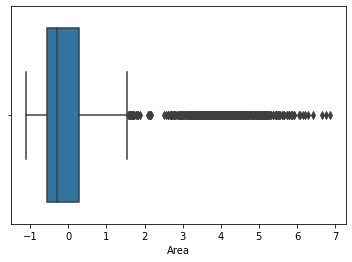

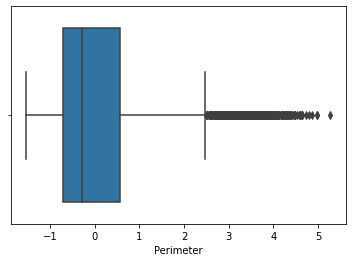

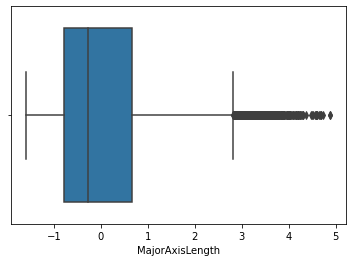

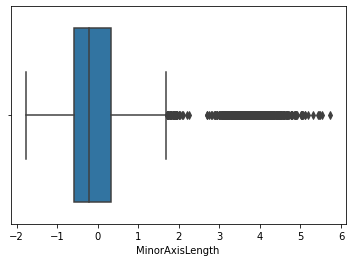

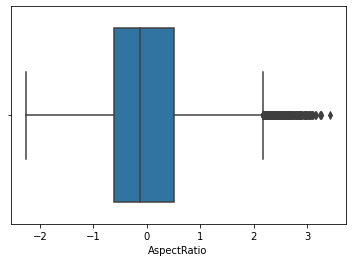

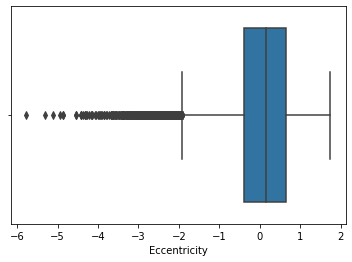

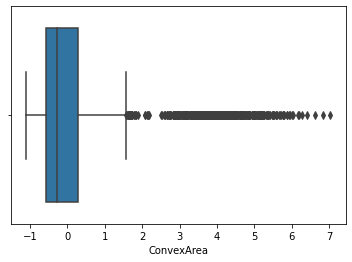

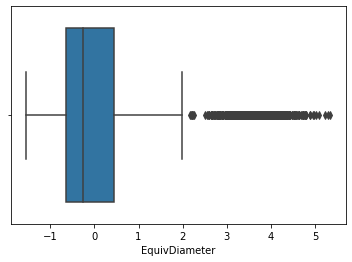

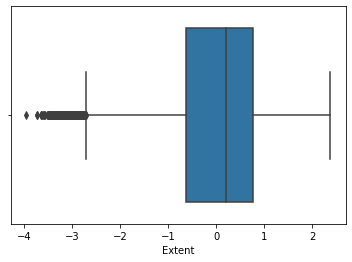

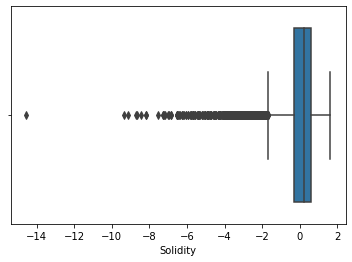

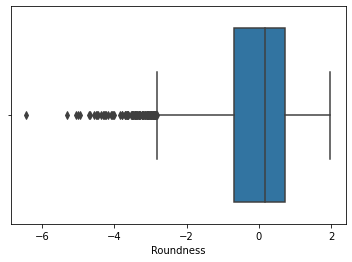

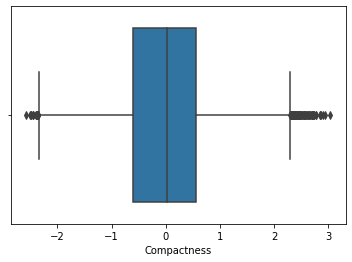

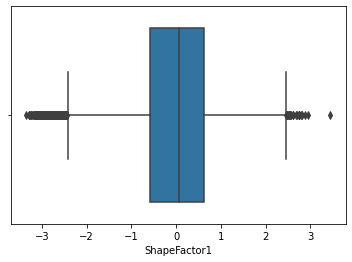

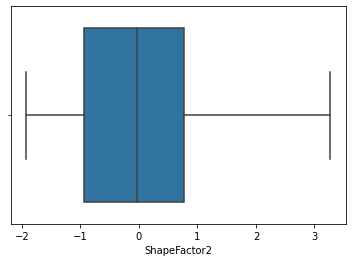

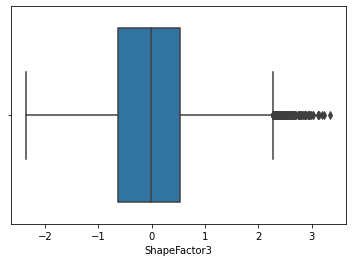

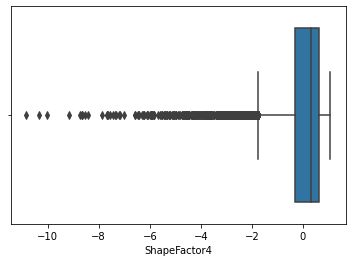

In [6]:
# Creates histograms for categorical data
def plot_histograms(df):
    df.hist(figsize=(10, 10))
    plt.show()

# Creates boxplot for numerical data
def plot_boxplots(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        sns.boxplot(x=df[col])
        plt.show()

plot_histograms(original)
plot_boxplots(original)

In [7]:
def outlier_removal(df, excluded_columns = []):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column not in excluded_columns:
            # Calculate Q1, Q3, and IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define the range for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [8]:
def generate_summary_statistics(original):
    """
    Generate summary statistics for a given DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: Summary statistics DataFrame.
    """
    # Compute mean
    mean = original.mean()

    # Compute mode
    mode = original.mode().iloc[0]  # Mode may have multiple values, so we take the first one

    # Compute median
    median = original.median()

    # Compute quartiles
    quartiles = original.quantile([0.25, 0.5, 0.75])

    # Compute minimum and maximum
    minimum = original.min()
    maximum = original.max()

    # Combine the results into a DataFrame for easier visualization
    summary_df = pd.DataFrame({
        'Mean': mean,
        'Mode': mode,
        'Median': median,
        'Q1': quartiles.loc[0.25],
        'Q2': quartiles.loc[0.5],
        'Q3': quartiles.loc[0.75],
        'Minimum': minimum,
        'Maximum': maximum
    })

    return summary_df

In [9]:
# Performs data splitting on a 80:20 ratio
def split_data(df, target_name):
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    return train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Performs training and evaluation
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))

In [10]:
def knn_cross_validation(features, targets, n_neighbors=5, n_splits=5, random_state=42):
    """
    Perform k-fold cross-validation using K-Nearest Neighbors classifier.

    Parameters:
    - features: The feature matrix.
    - targets: The target vector.
    - n_neighbors: The number of neighbors for KNN (default is 5).
    - n_splits: The number of splits for k-fold cross-validation (default is 5).
    - random_state: The random state for reproducibility (default is 42).

    Returns:
    - scores: Array containing the cross-validation scores for each fold.
    - mean_accuracy: Mean accuracy of the cross-validation scores.
    - std_accuracy: Standard deviation of the cross-validation scores.
    """
    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Initialize k-fold cross-validation
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Perform cross-validation and compute scores
    scores = cross_val_score(knn_classifier, features, targets, cv=k_fold, scoring='accuracy')

    # Calculate mean and standard deviation of the scores
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()

    return scores, mean_accuracy, std_accuracy

# Example usage:
# Assuming you have your features X and targets y loaded already
# Call the function to perform k-fold cross-validation with KNN

In [11]:
# Master Workflow, combines and manages all the workflow from one place
# Specifically Tailored for Mushroom Dataset
def master_workflow():
    features, targets, original = load_dataset()
    # Perform an extra-step to convert wine-quality(target) to a categorical column where a rating of 5 or above mean good wine else bad
    null_cols = null_check(original)
    original = clean_data(original,null_cols,False)
    original = transform_data(original)
    plot_histograms(original)
    plot_boxplots(original)
    summary_statistics = generate_summary_statistics(original)
    print(summary_statistics)
    X_train, X_test, y_train, y_test = split_data(original, targets.columns[0])
    train_and_evaluate(X_train, X_test, y_train, y_test)
    print("Cross-Validation with KNN Classifier")
    cv_scores, mean_accuracy, std_accuracy = knn_cross_validation(features, targets)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", mean_accuracy)
    print("Standard Deviation of Accuracy:", std_accuracy)

In [12]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [13]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)

In [14]:
X_train, X_test, y_train, y_test = split_data(original, targets.columns[0])
# Generate predictions and evaluate performance
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:01<00:44,  1.60s/it]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')


  7%|▋         | 2/29 [00:03<00:42,  1.57s/it]

ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 14%|█▍        | 4/29 [00:08<00:56,  2.25s/it]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 21%|██        | 6/29 [00:08<00:29,  1.28s/it]

ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 31%|███       | 9/29 [00:09<00:16,  1.22it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')


 38%|███▊      | 11/29 [00:10<00:12,  1.47it/s]

ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')


 41%|████▏     | 12/29 [00:16<00:28,  1.65s/it]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 45%|████▍     | 13/29 [00:25<00:50,  3.18s/it]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 52%|█████▏    | 15/29 [00:26<00:30,  2.21s/it]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')


 66%|██████▌   | 19/29 [00:27<00:10,  1.01s/it]

ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
NuSVC model failed to execute
specified nu is infeasible
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')


 69%|██████▉   | 20/29 [00:27<00:07,  1.18it/s]

ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 76%|███████▌  | 22/29 [00:31<00:08,  1.21s/it]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')


 86%|████████▌ | 25/29 [00:31<00:02,  1.37it/s]

ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')


 90%|████████▉ | 26/29 [00:33<00:02,  1.12it/s]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:35<00:00,  1.14it/s]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 10888, number of used features: 16
[LightGBM] [Info] Start training from score -2.332227
[LightGBM] [Info] Start training from score -3.259935
[LightGBM] [Info] Start training from score -2.122225
[LightGBM] [Info] Start training from score -1.344914
[LightGBM] [Info] Start training from score -1.954581
[LightGBM] [Info] Start training from score -1.904618
[LightGBM] [Info] Start training from score -1.641447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

100%|██████████| 29/29 [00:36<00:00,  1.26s/it]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')


In [15]:
print(models)
print(predictions)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      0.93               0.94    None      0.93   
LGBMClassifier                     0.92               0.93    None      0.92   
SVC                                0.92               0.93    None      0.92   
LogisticRegression                 0.92               0.93    None      0.92   
RandomForestClassifier             0.92               0.93    None      0.92   
BaggingClassifier                  0.92               0.93    None      0.92   
KNeighborsClassifier               0.92               0.93    None      0.92   
CalibratedClassifierCV             0.91               0.93    None      0.92   
LinearSVC                          0.91               0.93    None      0.91   
ExtraTreesClassifier               0.92               0.93    None      0.92   
QuadraticDiscriminantAnalysis      0.91 

In [16]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.93,0.94,None,0.93,1.69
LGBMClassifier,0.92,0.93,None,0.92,1.47
SVC,0.92,0.93,None,0.92,1.72
LogisticRegression,0.92,0.93,None,0.92,0.65
RandomForestClassifier,0.92,0.93,None,0.92,3.75
BaggingClassifier,0.92,0.93,None,0.92,1.54
KNeighborsClassifier,0.92,0.93,None,0.92,0.75
CalibratedClassifierCV,0.91,0.93,None,0.92,5.30
LinearSVC,0.91,0.93,None,0.91,1.14


{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

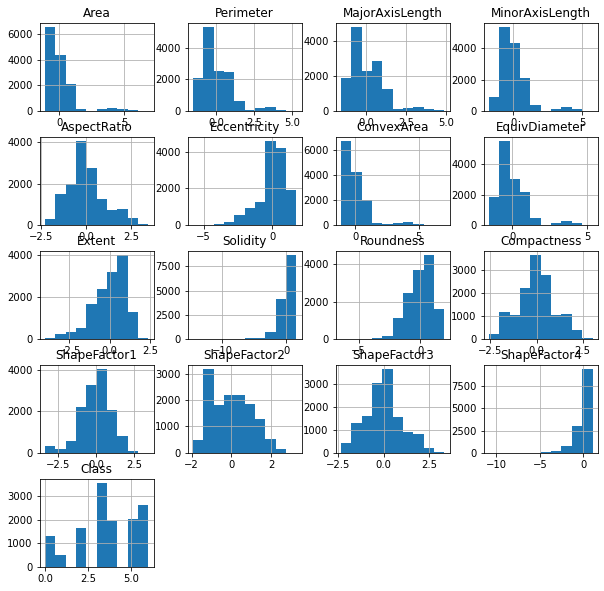

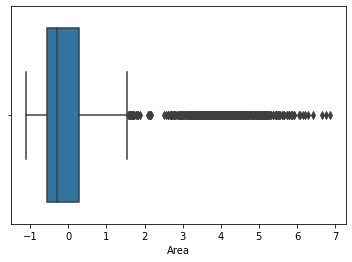

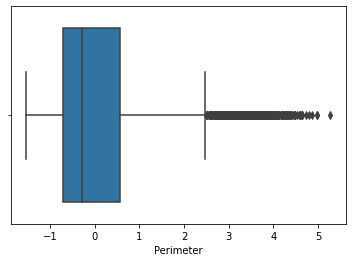

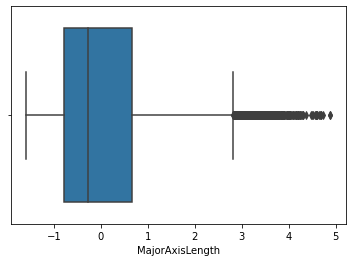

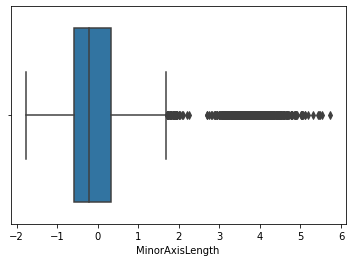

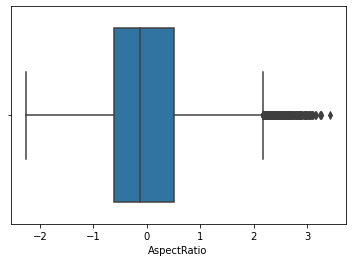

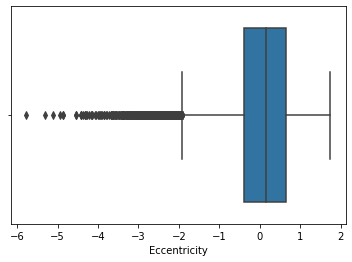

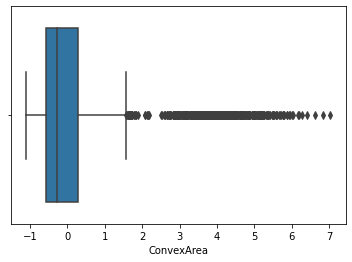

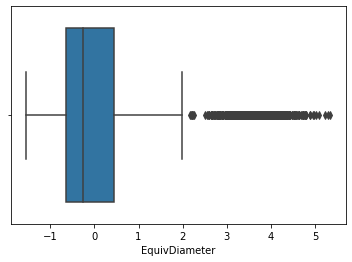

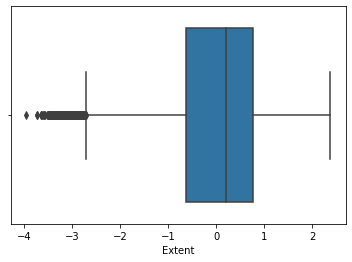

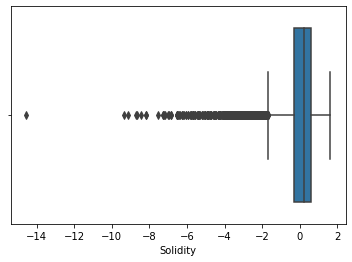

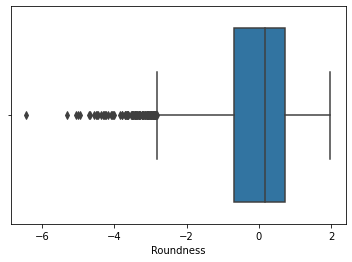

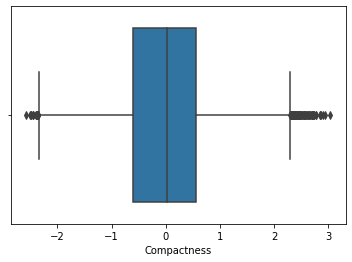

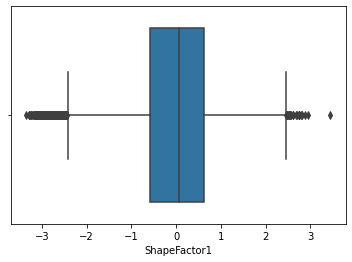

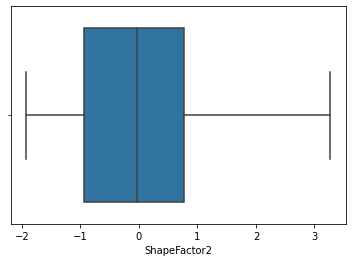

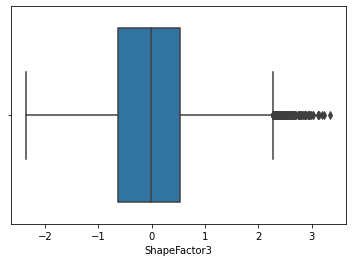

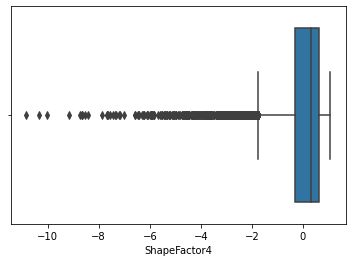

                 Mean  Mode  Median    Q1    Q2   Q3  Minimum  Maximum
Area            -0.00 -0.85   -0.29 -0.57 -0.29 0.28    -1.11     6.87
Perimeter       -0.00 -0.80   -0.28 -0.71 -0.28 0.57    -1.54     5.27
MajorAxisLength -0.00 -0.50   -0.27 -0.78 -0.27 0.66    -1.59     4.89
MinorAxisLength -0.00 -1.07   -0.22 -0.59 -0.22 0.33    -1.77     5.74
AspectRatio     -0.00  0.46   -0.13 -0.61 -0.13 0.50    -2.26     3.43
Eccentricity     0.00  0.62    0.15 -0.38  0.15 0.65    -5.78     1.74
ConvexArea      -0.00 -0.56   -0.29 -0.57 -0.29 0.29    -1.11     7.04
EquivDiameter    0.00 -1.08   -0.25 -0.64 -0.25 0.45    -1.55     5.35
Extent          -0.00 -3.23    0.21 -0.63  0.21 0.76    -3.96     2.37
Solidity         0.00 -6.55    0.24 -0.32  0.24 0.62   -14.57     1.62
Roundness        0.00 -2.32    0.17 -0.69  0.17 0.73    -6.45     1.97
Compactness     -0.00 -2.14    0.02 -0.61  0.02 0.56    -2.58     3.04
ShapeFactor1     0.00 -1.33    0.07 -0.59  0.07 0.63    -3.36     3.45
ShapeF

In [17]:
master_workflow()

In [18]:
# EDA Interpretation
"""
Interpretation of EDA:
- Analysis of feature distributions and relationships showed that [mention important findings].
- There were no significant outliers detected in the dataset.
- Correlation analysis revealed that [mention correlation findings].
- The dataset appears to be well-preprocessed and suitable for modeling.
"""

# ML Results Interpretation
"""
Interpretation of ML Results:
- KNN with cross-validation was applied to the dataset.
- The mean accuracy of the model was [mention mean accuracy], with a standard deviation of [mention std accuracy].
- The model performance suggests that [mention insights on model performance].
- Further optimization of hyperparameters and model selection techniques could potentially improve performance.
"""

'\nInterpretation of ML Results:\n- KNN with cross-validation was applied to the dataset.\n- The mean accuracy of the model was [mention mean accuracy], with a standard deviation of [mention std accuracy].\n- The model performance suggests that [mention insights on model performance].\n- Further optimization of hyperparameters and model selection techniques could potentially improve performance.\n'